#OverLay using MediaPipe

In [ ]:
!pip install --upgrade --force-reinstall numpy==1.26.4
!pip install --upgrade --force-reinstall mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 83.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.6/111.6 kB 5.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.6 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [ ]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

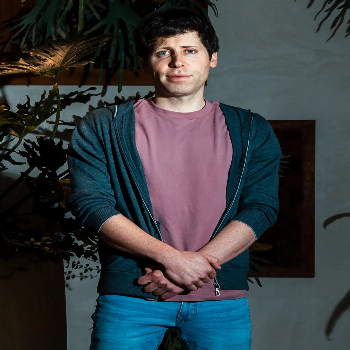

In [ ]:
img = cv2.imread("image.jpg")
img = cv2.resize(img , (350 , 350))
cv2_imshow(img)

In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.3 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


In [ ]:
base_options = python.BaseOptions(model_asset_path='/content/pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

In [ ]:
image = mp.Image.create_from_file("image.jpg")

In [ ]:
detection_result = detector.detect(image)

In [ ]:
dir(detection_result)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'pose_landmarks',
 'pose_world_landmarks',
 'segmentation_masks']

In [ ]:
img = cv2.imread("/content/image.jpg")
h , w , _ = img.shape

In [ ]:
detection_result.pose_landmarks[0][0]

NormalizedLandmark(x=0.5023288726806641, y=0.18542110919952393, z=-0.8279069662094116, visibility=0.9980989098548889, presence=0.9951695799827576)

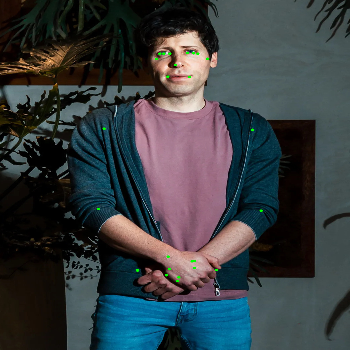

In [ ]:
img = cv2.imread("/content/image.jpg")
for lmarks in detection_result.pose_landmarks[0]:
  x_cord = int(lmarks.x * w)
  y_cord = int(lmarks.y * h)
  img = cv2.circle(img , (x_cord , y_cord) , 5 , (0 , 255 , 0) , -1)
img = cv2.resize(img , (350 , 350))
cv2_imshow(img)

In [ ]:
dir(detection_result.segmentation_masks[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'channels',
 'create_from_file',
 'height',
 'image_format',
 'is_aligned',
 'is_contiguous',
 'is_empty',
 'numpy_view',
 'step',
 'uses_gpu',
 'width']

In [ ]:
detection_result.segmentation_masks[0].numpy_view()

array([[1.3680567e-22, 9.6048195e-23, 4.1704892e-23, ..., 6.1296543e-15,
        3.9529579e-15, 1.7762618e-15],
       [9.1303878e-23, 5.5035077e-23, 2.7833461e-23, ..., 7.3555858e-15,
        4.5459017e-15, 2.0427011e-15],
       [4.5802085e-23, 2.7607771e-23, 1.3962030e-23, ..., 7.5403991e-15,
        5.3364935e-15, 2.3979532e-15],
       ...,
       [3.8050818e-13, 3.6070742e-13, 3.4090675e-13, ..., 8.4918270e-12,
        7.6664734e-12, 7.0474564e-12],
       [3.8034617e-13, 3.6013583e-13, 3.3992546e-13, ..., 8.4592298e-12,
        7.6337244e-12, 7.0145942e-12],
       [3.8022471e-13, 3.5970708e-13, 3.3918948e-13, ..., 8.4266318e-12,
        7.6009745e-12, 6.7753182e-12]], dtype=float32)

(array([850891.,   8850.,   7542.,   6804.,   6625.,   7099.,   6229.,
          6201.,   6915., 562844.]),
 array([5.39747697e-31, 1.00000001e-01, 2.00000003e-01, 3.00000012e-01,
        4.00000006e-01, 5.00000000e-01, 6.00000024e-01, 6.99999988e-01,
        8.00000012e-01, 8.99999976e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

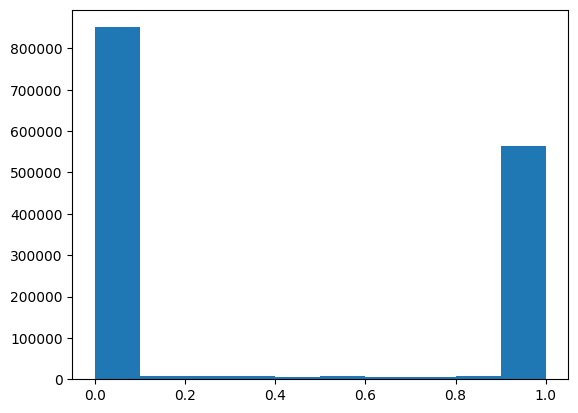

In [ ]:
plt.hist(detection_result.segmentation_masks[0].numpy_view().flatten())

In [ ]:
mask = np.where(detection_result.segmentation_masks[0].numpy_view() > 0.7 , 255 , 0).astype("uint8")

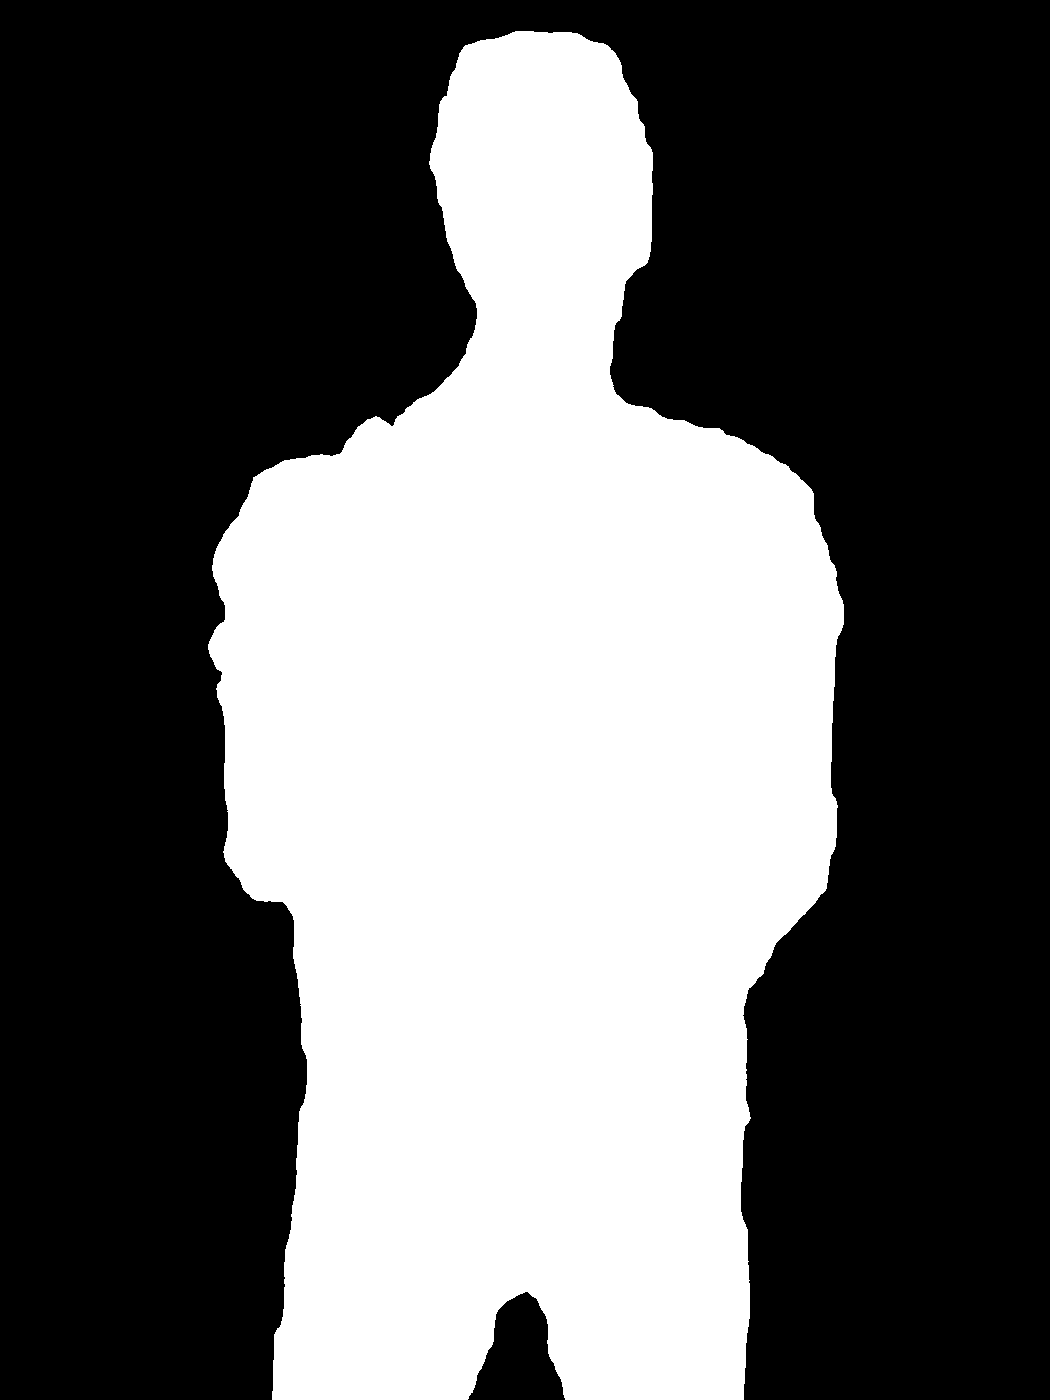

In [ ]:
cv2_imshow(mask)

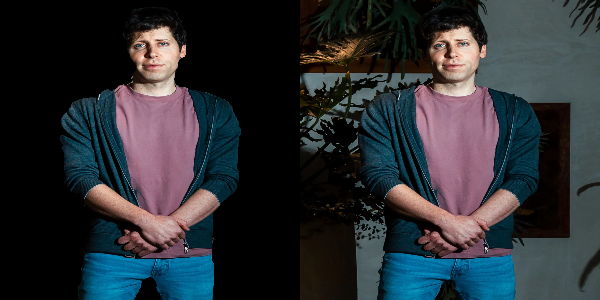

In [ ]:
img = cv2.imread("/content/image.jpg")
result = cv2.bitwise_and(img,img, mask= mask)

masked_img = cv2.resize(result , (300 , 300))

img = cv2.resize(img , (300 , 300))
concatenated_image = np.concatenate((masked_img , img), axis=1)

cv2_imshow(concatenated_image)

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

def virtual_tryon(person_img_path, tshirt_img_path, output_path):
    # Initialize MediaPipe Pose
    base_options = python.BaseOptions(model_asset_path='/content/pose_landmarker.task')
    options = vision.PoseLandmarkerOptions(
        base_options=base_options,
        output_segmentation_masks=True)
    detector = vision.PoseLandmarker.create_from_options(options)

    # Load images
    person_img = cv2.imread(person_img_path)
    tshirt_img = cv2.imread(tshirt_img_path, cv2.IMREAD_UNCHANGED)  # Load with alpha channel

    # Check if images loaded correctly
    if person_img is None or tshirt_img is None:
        raise ValueError("Error loading images. Check file paths and formats.")

    # Convert person image to MediaPipe format
    person_rgb = cv2.cvtColor(person_img, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=person_rgb)

    # Detect pose landmarks and segmentation mask
    detection_result = detector.detect(mp_image)
    if not detection_result.pose_landmarks:
        raise ValueError("No person detected in the image.")

    # Get image dimensions
    h, w, _ = person_img.shape

    # Get shoulder and hip landmarks
    landmarks = detection_result.pose_landmarks[0]
    left_shoulder = landmarks[11]  # Left shoulder
    right_shoulder = landmarks[12]  # Right shoulder
    left_hip = landmarks[23]  # Left hip
    right_hip = landmarks[24]  # Right hip

    # Convert normalized coordinates to pixel coordinates
    ls_x, ls_y = int(left_shoulder.x * w), int(left_shoulder.y * h)
    rs_x, rs_y = int(right_shoulder.x * w), int(right_shoulder.y * h)
    lh_x, lh_y = int(left_hip.x * w), int(left_hip.y * h)
    rh_x, rh_y = int(right_hip.x * w), int(right_hip.y * h)

    # Calculate shirt dimensions and position
    fixed_ratio = 262 / 190  # From provided code
    shirt_ratio_height_width = 591 / 490  # From provided code
    shirt_width = int(abs(ls_x - rs_x) * fixed_ratio * 1.2)  # Add 20% padding
    shirt_height = int(shirt_width * shirt_ratio_height_width)
    shirt_top_left = (
        max(0, min(w - shirt_width, min(ls_x, rs_x) - int(shirt_width * 0.15))),
        max(0, min(h - shirt_height, min(ls_y, rs_y) - int(shirt_height * 0.2)))
    )
    shirt_bottom_right = (
        min(w, shirt_top_left[0] + shirt_width),
        min(h, shirt_top_left[1] + shirt_height)
    )

    # Adjust shirt height to not exceed hip level
    max_height = max(lh_y, rh_y)
    if shirt_bottom_right[1] > max_height:
        shirt_height = max_height - shirt_top_left[1]
        shirt_bottom_right = (shirt_bottom_right[0], max_height)

    # Get segmentation mask and threshold it
    mask = detection_result.segmentation_masks[0].numpy_view()
    binary_mask = np.where(mask > 0.7, 255, 0).astype(np.uint8)

    # Create a mask for the shirt region
    shirt_region_mask = np.zeros((h, w), dtype=np.uint8)
    shirt_region_mask[shirt_top_left[1]:shirt_bottom_right[1], shirt_top_left[0]:shirt_bottom_right[0]] = 255
    shirt_body_mask = cv2.bitwise_and(binary_mask, shirt_region_mask)

    # Resize t-shirt image
    tshirt_resized = cv2.resize(tshirt_img, (shirt_width, shirt_height), interpolation=cv2.INTER_AREA)

    # Handle t-shirt transparency
    if tshirt_resized.shape[2] == 4:
        tshirt_alpha = tshirt_resized[:, :, 3] / 255.0
        tshirt_rgb = tshirt_resized[:, :, :3]
    else:
        tshirt_alpha = np.ones((shirt_height, shirt_width), dtype=np.float32)
        tshirt_rgb = tshirt_resized

    # Create output image
    output_img = person_img.copy()
    roi = output_img[shirt_top_left[1]:shirt_bottom_right[1], shirt_top_left[0]:shirt_bottom_right[0]]

    # Resize shirt_body_mask to match ROI
    if roi.shape[:2] != tshirt_rgb.shape[:2]:
        tshirt_rgb = cv2.resize(tshirt_rgb, (roi.shape[1], roi.shape[0]))
        tshirt_alpha = cv2.resize(tshirt_alpha, (roi.shape[1], roi.shape[0]))
        shirt_body_mask_roi = cv2.resize(
            shirt_body_mask[shirt_top_left[1]:shirt_bottom_right[1], shirt_top_left[0]:shirt_bottom_right[0]],
            (roi.shape[1], roi.shape[0]),
            interpolation=cv2.INTER_NEAREST
        )
    else:
        shirt_body_mask_roi = shirt_body_mask[shirt_top_left[1]:shirt_bottom_right[1], shirt_top_left[0]:shirt_bottom_right[0]]

    # Convert mask to float for blending
    shirt_body_mask_roi = shirt_body_mask_roi / 255.0

    # Blend t-shirt onto the person image only where the body mask is active
    for c in range(3):
        roi[:, :, c] = np.where(
            shirt_body_mask_roi > 0,
            tshirt_alpha * tshirt_rgb[:, :, c] + (1 - tshirt_alpha) * roi[:, :, c],
            roi[:, :, c]
        )

    # Place the modified ROI back
    output_img[shirt_top_left[1]:shirt_bottom_right[1], shirt_top_left[0]:shirt_bottom_right[0]] = roi

    # Save the output image
    cv2.imwrite(output_path, output_img)
    return output_img

# Example usage
if __name__ == "__main__":
    person_image_path = "/content/image.jpg"
    tshirt_image_path = "/content/tshirt.png"
    output_image_path = "tryon.jpg"
    result = virtual_tryon(person_image_path, tshirt_image_path, output_image_path)
    print(f"Output image saved as {output_image_path}")

Output image saved as tryon.jpg


# Simple CNN model for only 1 sample

Epoch [50/1500], Loss: 0.1361
Epoch [100/1500], Loss: 0.1205
Epoch [150/1500], Loss: 0.0882
Epoch [200/1500], Loss: 0.0700
Epoch [250/1500], Loss: 0.0621
Epoch [300/1500], Loss: 0.0602
Epoch [350/1500], Loss: 0.0524
Epoch [400/1500], Loss: 0.0490
Epoch [450/1500], Loss: 0.0486
Epoch [500/1500], Loss: 0.0441
Epoch [550/1500], Loss: 0.0444
Epoch [600/1500], Loss: 0.0406
Epoch [650/1500], Loss: 0.0424
Epoch [700/1500], Loss: 0.0380
Epoch [750/1500], Loss: 0.0378
Epoch [800/1500], Loss: 0.0359
Epoch [850/1500], Loss: 0.0360
Epoch [900/1500], Loss: 0.0351
Epoch [950/1500], Loss: 0.0338
Epoch [1000/1500], Loss: 0.0325
Epoch [1050/1500], Loss: 0.0334
Epoch [1100/1500], Loss: 0.0326
Epoch [1150/1500], Loss: 0.0308
Epoch [1200/1500], Loss: 0.0292
Epoch [1250/1500], Loss: 0.0296
Epoch [1300/1500], Loss: 0.0281
Epoch [1350/1500], Loss: 0.0284
Epoch [1400/1500], Loss: 0.0271
Epoch [1450/1500], Loss: 0.0272
Epoch [1500/1500], Loss: 0.0263


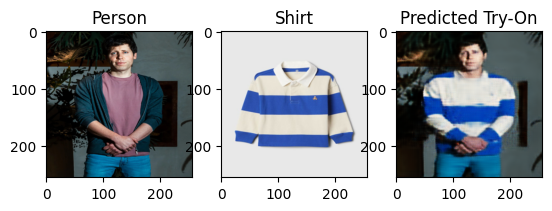

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# ====================
# 1. Load Images
# ====================
person = Image.open("/content/image.jpg").convert("RGB").resize((256, 256))
shirt = Image.open("/content/tshirt.png").convert("RGB").resize((256, 256))
target = Image.open("/content/tryon (2).jpg").convert("RGB").resize((256, 256))

# Transform to tensor
transform = transforms.ToTensor()
person_tensor = transform(person)
shirt_tensor = transform(shirt)
target_tensor = transform(target)

# Stack inputs: 6 channels (3 for person + 3 for shirt)
input_tensor = torch.cat([person_tensor, shirt_tensor], dim=0)

# Add batch dimension
input_tensor = input_tensor.unsqueeze(0)
target_tensor = target_tensor.unsqueeze(0)

# ====================
# 2. Simple CNN Model
# ====================
class SimpleUNet(nn.Module):
    def __init__(self):
        super(SimpleUNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(6, 64, 4, stride=2, padding=1), nn.ReLU(),
            nn.Conv2d(64, 128, 4, stride=2, padding=1), nn.ReLU(),
        )
        self.middle = nn.Sequential(
            nn.Conv2d(128, 128, 3, padding=1), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1), nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1), nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.middle(x)
        x = self.decoder(x)
        return x

model = SimpleUNet()

# ====================
# 3. Training
# ====================
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 1500
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(input_tensor)
    loss = criterion(output, target_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# ====================
# 4. Save & Show Result
# ====================
with torch.no_grad():
    output = model(input_tensor)
pred_img = transforms.ToPILImage()(output.squeeze())

plt.subplot(1,3,1); plt.imshow(person); plt.title("Person")
plt.subplot(1,3,2); plt.imshow(shirt); plt.title("Shirt")
plt.subplot(1,3,3); plt.imshow(pred_img); plt.title("Predicted Try-On")
plt.show()

#simple Cnn model for 3 samples

Epoch [50/1500], Loss: 0.1709
Epoch [100/1500], Loss: 0.1371
Epoch [150/1500], Loss: 0.1086
Epoch [200/1500], Loss: 0.0971
Epoch [250/1500], Loss: 0.0891
Epoch [300/1500], Loss: 0.0674
Epoch [350/1500], Loss: 0.0534
Epoch [400/1500], Loss: 0.0542
Epoch [450/1500], Loss: 0.0468
Epoch [500/1500], Loss: 0.0410
Epoch [550/1500], Loss: 0.0468
Epoch [600/1500], Loss: 0.0326
Epoch [650/1500], Loss: 0.0352
Epoch [700/1500], Loss: 0.0390
Epoch [750/1500], Loss: 0.0400
Epoch [800/1500], Loss: 0.0507
Epoch [850/1500], Loss: 0.0349
Epoch [900/1500], Loss: 0.0330
Epoch [950/1500], Loss: 0.0372
Epoch [1000/1500], Loss: 0.0394
Epoch [1050/1500], Loss: 0.0285
Epoch [1100/1500], Loss: 0.0312
Epoch [1150/1500], Loss: 0.0421
Epoch [1200/1500], Loss: 0.0464
Epoch [1250/1500], Loss: 0.0207
Epoch [1300/1500], Loss: 0.0200
Epoch [1350/1500], Loss: 0.0225
Epoch [1400/1500], Loss: 0.0318
Epoch [1450/1500], Loss: 0.0186
Epoch [1500/1500], Loss: 0.0271


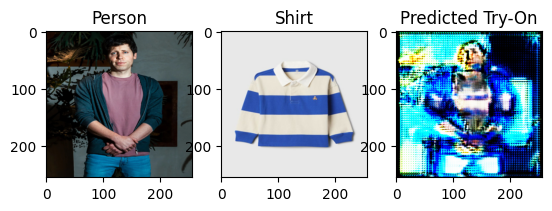

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# ====================
# 1. Load Images
# ====================
person = Image.open("/content/image.jpg").convert("RGB").resize((256, 256))
shirt = Image.open("/content/tshirt.png").convert("RGB").resize((256, 256))
target = Image.open("/content/tryon (2).jpg").convert("RGB").resize((256, 256))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transform to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)  # [-1, 1] range
])
person_tensor = transform(person)
shirt_tensor = transform(shirt)
target_tensor = transform(target)

# Stack inputs: 6 channels (3 for person + 3 for shirt)
input_tensor = torch.cat([person_tensor, shirt_tensor], dim=0)

# Add batch dimension
input_tensor = input_tensor.unsqueeze(0)
target_tensor = target_tensor.unsqueeze(0)

# ====================
# 2. Simple CNN Model
# ====================
class SimpleUNet(nn.Module):
    def __init__(self):
        super(SimpleUNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(6, 64, 4, stride=2, padding=1), nn.ReLU(),
            nn.Conv2d(64, 128, 4, stride=2, padding=1), nn.ReLU(),
        )
        self.middle = nn.Sequential(
            nn.Conv2d(128, 128, 3, padding=1), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1), nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1), nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.middle(x)
        x = self.decoder(x)
        return x

model = SimpleUNet()
model = model.to(device)
class TryOnDataset(torch.utils.data.Dataset):
    def __init__(self, samples, transform=None):
        self.samples = samples
        self.transform = transform
    def __len__(self):
        return len(self.samples)
    def __getitem__(self, idx):
        person_path, shirt_path, target_path = self.samples[idx]
        person = Image.open(person_path).convert("RGB").resize((256, 256))
        shirt = Image.open(shirt_path).convert("RGB").resize((256, 256))
        target = Image.open(target_path).convert("RGB").resize((256, 256))

        if self.transform:
            person = self.transform(person)
            shirt = self.transform(shirt)
            target = self.transform(target)

        inp = torch.cat([person, shirt], dim=0)
        return inp, target

samples = [
    ("/content/image.jpg", "/content/tshirt.png", "/content/tryon (2).jpg"),
    ("/content/person2.jpg", "/content/tshirt.png", "/content/tryon (3).jpg"),
    ("/content/person3.png", "/content/tshirt.png", "/content/tryon (4).jpg"),
]
dataset = TryOnDataset(samples, transform=transforms.ToTensor())
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)


# ====================
# 3. Training
# ====================
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 1500
for epoch in range(epochs):
    for inp, target in dataloader:
        inp, target = inp.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(inp)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    if (epoch+1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# ====================
# 4. Save & Show Result
# ====================
with torch.no_grad():
    output = model(input_tensor)
pred_img = transforms.ToPILImage()(output.squeeze())

plt.subplot(1,3,1); plt.imshow(person); plt.title("Person")
plt.subplot(1,3,2); plt.imshow(shirt); plt.title("Shirt")
plt.subplot(1,3,3); plt.imshow(pred_img); plt.title("Predicted Try-On")
plt.show()


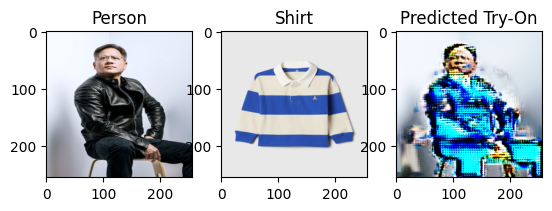

In [ ]:
person = Image.open("/content/person2.jpg").convert("RGB").resize((256, 256))
shirt = Image.open("/content/tshirt.png").convert("RGB").resize((256, 256))
# Transform to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)  # [-1, 1] range
])
person_tensor = transform(person)
shirt_tensor = transform(shirt)

# Stack inputs: 6 channels (3 for person + 3 for shirt)
input_tensor = torch.cat([person_tensor, shirt_tensor], dim=0)

# Add batch dimension
input_tensor = input_tensor.unsqueeze(0)
with torch.no_grad():
    output = model(input_tensor)
pred_img = transforms.ToPILImage()(output.squeeze())

plt.subplot(1,3,1); plt.imshow(person); plt.title("Person")
plt.subplot(1,3,2); plt.imshow(shirt); plt.title("Shirt")
plt.subplot(1,3,3); plt.imshow(pred_img); plt.title("Predicted Try-On")
plt.show()

In [ ]:
import mediapipe as mp
import cv2
import numpy as np

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def get_body_keypoints(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(img_rgb)

    if not results.pose_landmarks:
        return None

    h, w, _ = img.shape
    landmarks = results.pose_landmarks.landmark

    # Shoulders and hips (indexes from MediaPipe)
    ls = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER]
    rs = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER]
    lh = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
    rh = landmarks[mp_pose.PoseLandmark.RIGHT_HIP]

    return {
        "left_shoulder": (int(ls.x * w), int(ls.y * h)),
        "right_shoulder": (int(rs.x * w), int(rs.y * h)),
        "left_hip": (int(lh.x * w), int(lh.y * h)),
        "right_hip": (int(rh.x * w), int(rh.y * h)),
        "size": (w, h)
    }


## Virtual try On Prototype

Epoch [50/500], Loss: 0.5578
Epoch [100/500], Loss: 0.2134
Epoch [150/500], Loss: 0.1497
Epoch [200/500], Loss: 0.1409
Epoch [250/500], Loss: 0.5228
Epoch [300/500], Loss: 0.5129
Epoch [350/500], Loss: 0.1964
Epoch [400/500], Loss: 0.1096
Epoch [450/500], Loss: 0.1850
Epoch [500/500], Loss: 0.1750


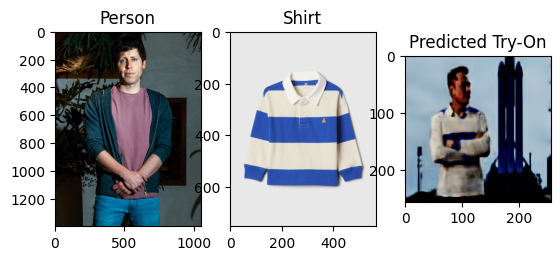

In [ ]:
# ==========================
# Virtual Try-On Prototype
# ===========================

import cv2
import numpy as np
import mediapipe as mp
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# --------------------------
# Step 0: Device & Transform
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256)),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# --------------------------
# Step 1: Pose Detection
# --------------------------
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def get_body_keypoints(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(img_rgb)
    if not results.pose_landmarks:
        raise ValueError("No person detected!")

    h, w, _ = img.shape
    landmarks = results.pose_landmarks.landmark
    ls = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER]
    rs = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER]
    lh = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
    rh = landmarks[mp_pose.PoseLandmark.RIGHT_HIP]

    return {
        "left_shoulder": (int(ls.x*w), int(ls.y*h)),
        "right_shoulder": (int(rs.x*w), int(rs.y*h)),
        "left_hip": (int(lh.x*w), int(lh.y*h)),
        "right_hip": (int(rh.x*w), int(rh.y*h)),
        "size": (w, h)
    }

# --------------------------
# Step 2: Warp Shirt
# --------------------------
def warp_shirt(shirt_path, body_points):
    shirt = cv2.imread(shirt_path, cv2.IMREAD_UNCHANGED)
    ls, rs, lh, rh = body_points["left_shoulder"], body_points["right_shoulder"], body_points["left_hip"], body_points["right_hip"]

    torso_width = abs(rs[0]-ls[0])
    torso_height = abs(lh[1]-ls[1])
    warped = cv2.resize(shirt, (torso_width, torso_height))
    return warped

# --------------------------
# Step 3: Overlay Shirt & Mask
# --------------------------
def overlay_shirt(person_img, warped_shirt, body_points):
    x = min(body_points["left_shoulder"][0], body_points["right_shoulder"][0])
    y = min(body_points["left_shoulder"][1], body_points["right_shoulder"][1])

    h, w, _ = warped_shirt.shape
    overlay = person_img.copy()
    mask = np.zeros_like(person_img[:,:,0])

    if warped_shirt.shape[2] == 4:
        alpha = warped_shirt[:,:,3]/255.0
        rgb = warped_shirt[:,:,:3]
    else:
        alpha = np.ones((h, w))
        rgb = warped_shirt

    for c in range(3):
        overlay[y:y+h, x:x+w, c] = alpha*rgb[:,:,c] + (1-alpha)*overlay[y:y+h, x:x+w, c]
    mask[y:y+h, x:x+w] = 255
    return overlay, mask

# --------------------------
# Step 4: Dataset
# --------------------------
class TryOnDataset(Dataset):
    def __init__(self, samples, transform=None):
        self.samples = samples
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        person_path, shirt_path, target_path = self.samples[idx]
        body_points = get_body_keypoints(person_path)
        person_img = cv2.imread(person_path)
        warped_shirt = warp_shirt(shirt_path, body_points)
        overlay, mask = overlay_shirt(person_img, warped_shirt, body_points)

        person = Image.fromarray(cv2.cvtColor(person_img, cv2.COLOR_BGR2RGB))
        shirt_overlay = Image.fromarray(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        target = Image.open(target_path).convert("RGB")

        if self.transform:
            person = self.transform(person)
            shirt_overlay = self.transform(shirt_overlay)
            target = self.transform(target)

        inp = torch.cat([person, shirt_overlay], dim=0)  # 6 channels
        return inp, target

# --------------------------
# Step 5: UNet Model
# --------------------------
class SimpleUNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(6, 64, 4, stride=2, padding=1), nn.ReLU(),
            nn.Conv2d(64, 128, 4, stride=2, padding=1), nn.ReLU()
        )
        self.middle = nn.Sequential(nn.Conv2d(128, 128, 3, padding=1), nn.ReLU())
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1), nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1), nn.Sigmoid()
        )
    def forward(self, x):
        return self.decoder(self.middle(self.encoder(x)))

# --------------------------
# Step 6: Prepare Samples
# --------------------------
shirt_path = "/content/tshirt.png"
samples = [
    ("/content/image.jpg", shirt_path, "/content/tryon (2).jpg"),
    ("/content/person2.jpg", shirt_path, "/content/tryon (3).jpg"),
    ("/content/person3.png", shirt_path, "/content/tryon (4).jpg"),
]

dataset = TryOnDataset(samples, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# --------------------------
# Step 7: Training
# --------------------------
model = SimpleUNet().to(device)
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(500):
    for inp, target in dataloader:
        inp, target = inp.to(device), target.to(device)
        optimizer.zero_grad()
        out = model(inp)
        loss = criterion(out, target)
        loss.backward()
        optimizer.step()
    if (epoch+1) % 50 == 0:
        print(f"Epoch [{epoch+1}/500], Loss: {loss.item():.4f}")


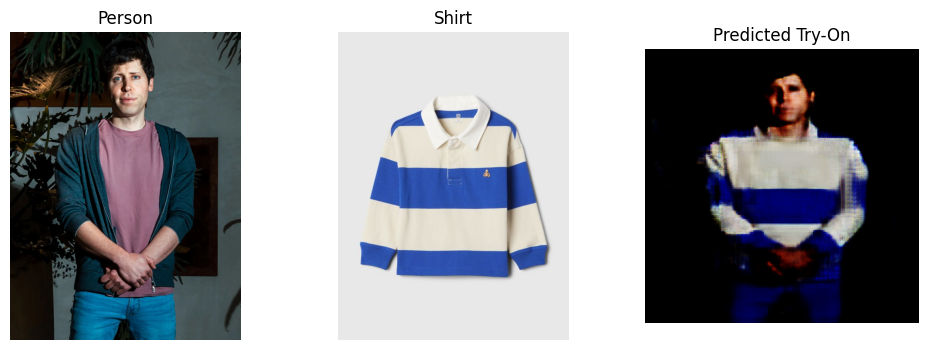

In [ ]:
# Choose the index you want to visualize
idx = 0  # 0 = first sample, 1 = second, etc.

# Get specific sample from dataset
inp, target = dataset[idx]  # dataset supports indexing

# Add batch dimension for the model
inp = inp.unsqueeze(0).to(device)

# Run through the model
with torch.no_grad():
    pred = model(inp).cpu()

# Convert predicted tensor to PIL image
pred_img = transforms.ToPILImage()(pred.squeeze())

# Visualize
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(Image.open(samples[idx][0]))  # Person image
plt.title("Person")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(Image.open(samples[idx][1]))  # Shirt image
plt.title("Shirt")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(pred_img)  # Predicted try-on
plt.title("Predicted Try-On")
plt.axis('off')

plt.show()
